In [ ]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("train_features.csv")

# Optionally convert datetime (if you'll use it elsewhere)
df['datetime'] = pd.to_datetime(df['datetime'], errors='ignore')

<ipython-input-1-58be0c0e28e1>:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['datetime'] = pd.to_datetime(df['datetime'], errors='ignore')


In [ ]:
df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'date', 'year', 'quarter', 'month', 'week', 'hour',
       'day_of_year', 'day_of_month', 'day_of_week', 'eic_count_client',
       'installed_capacity_client', 'date_client', 'temperature_h_mean',
       'dewpoint_h_mean', 'rain_h_mean', 'snowfall_h_mean',
       'surface_pressure_h_mean', 'cloudcover_total_h_mean',
       'cloudcover_low_h_mean', 'cloudcover_mid_h_mean',
       'cloudcover_high_h_mean', 'windspeed_10m_h_mean',
       'winddirection_10m_h_mean', 'shortwave_radiation_h_mean',
       'direct_solar_radiation_h_mean', 'diffuse_radiation_h_mean', 'hour_h',
       'hours_ahead_f_mean', 'temperature_f_mean', 'dewpoint_f_mean',
       'cloudcover_high_f_mean', 'cloudcover_low_f_mean',
       'cloudcover_mid_f_mean', 'cloudcover_total_f_mean',
       '10_metre_u_wind_component_f_mean', '10_metre_v_wind_component_f_mean',
       'direct_solar_radiation_f_mean',
       'surface_solar_r

In [ ]:
# Drop row_id and prediction_unit_id (not useful for grouping)
df = df.drop(columns=['row_id', 'prediction_unit_id'], errors='ignore')

# Define index columns — used for grouping/pivoting
pivot_index = [
    'datetime', 'county', 'is_business', 'product_type',
    'date', 'year', 'quarter', 'month', 'week', 'hour',
    'day_of_year', 'day_of_month', 'day_of_week'
]

# Split the dataset:
# 1. Just the columns we'll pivot
df_targets = df[pivot_index + ['target', 'is_consumption']]

# 2. All the other features (excluding 'target' and 'is_consumption')
df_features = df.drop(columns=['target', 'is_consumption'])

# Pivot to get consumption and production
df_pivoted = df_targets.pivot_table(
    index=pivot_index,
    columns='is_consumption',
    values='target'
).reset_index()

# Rename columns
df_pivoted.columns.name = None
df_pivoted = df_pivoted.rename(columns={True: 'consumption', False: 'production'})

# Merge the features back in using the same keys
df_merged = pd.merge(df_pivoted, df_features, on=pivot_index, how='left')

# Preview result
df_merged.head()

,datetime,county,is_business,product_type,date,year,quarter,month,week,hour,...,target_6_days_ago,target_7_days_ago,target_8_days_ago,target_9_days_ago,target_10_days_ago,target_11_days_ago,target_12_days_ago,target_13_days_ago,target_14_days_ago,target_15_days_ago
0,2021-09-01,0,0,1,2021-09-01,2021,3,9,35,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01,0,0,1,2021-09-01,2021,3,9,35,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01,0,0,2,2021-09-01,2021,3,9,35,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01,0,0,2,2021-09-01,2021,3,9,35,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01,0,0,3,2021-09-01,2021,3,9,35,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged.head()

,datetime,county,is_business,product_type,date,year,quarter,month,week,hour,day_of_year,day_of_month,day_of_week,production,consumption,eic_count_client,installed_capacity_client,date_client,temperature_h_mean,dewpoint_h_mean,rain_h_mean,snowfall_h_mean,surface_pressure_h_mean,cloudcover_total_h_mean,cloudcover_low_h_mean,cloudcover_mid_h_mean,cloudcover_high_h_mean,windspeed_10m_h_mean,winddirection_10m_h_mean,shortwave_radiation_h_mean,direct_solar_radiation_h_mean,diffuse_radiation_h_mean,hour_h,hours_ahead_f_mean,temperature_f_mean,dewpoint_f_mean,cloudcover_high_f_mean,cloudcover_low_f_mean,cloudcover_mid_f_mean,cloudcover_total_f_mean,10_metre_u_wind_component_f_mean,10_metre_v_wind_component_f_mean,direct_solar_radiation_f_mean,surface_solar_radiation_downwards_f_mean,snowfall_f_mean,total_precipitation_f_mean,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,target_2_days_ago,target_3_days_ago,target_4_days_ago,target_5_days_ago,target_6_days_ago,target_7_days_ago,target_8_days_ago,target_9_days_ago,target_10_days_ago,target_11_days_ago,target_12_days_ago,target_13_days_ago,target_14_days_ago,target_15_days_ago
0,2021-09-01,0,0,1,2021-09-01,2021,3,9,35,0,244,1,2,0.713,96.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01,0,0,1,2021-09-01,2021,3,9,35,0,244,1,2,0.713,96.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01,0,0,2,2021-09-01,2021,3,9,35,0,244,1,2,0.000,17.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01,0,0,2,2021-09-01,2021,3,9,35,0,244,1,2,0.000,17.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01,0,0,3,2021-09-01,2021,3,9,35,0,244,1,2,2.904,656.859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged.shape

(2017824, 68)

In [ ]:
df_merged.isna().sum(axis=1).value_counts().sort_index().head()

,count
0,1919480
1,11644
2,3792
3,4052
4,3840


95.1% of rows have no missing values, so we just drop rows that are missing values



In [ ]:
df_clean = df_merged.dropna()

# Drop non-numeric columns (like datetime, county, etc.)
numeric_df = df_clean.select_dtypes(include='number')

In [ ]:
df_clean.head()

,datetime,county,is_business,product_type,date,year,quarter,month,week,hour,day_of_year,day_of_month,day_of_week,production,consumption,eic_count_client,installed_capacity_client,date_client,temperature_h_mean,dewpoint_h_mean,rain_h_mean,snowfall_h_mean,surface_pressure_h_mean,cloudcover_total_h_mean,cloudcover_low_h_mean,cloudcover_mid_h_mean,cloudcover_high_h_mean,windspeed_10m_h_mean,winddirection_10m_h_mean,shortwave_radiation_h_mean,direct_solar_radiation_h_mean,diffuse_radiation_h_mean,hour_h,hours_ahead_f_mean,temperature_f_mean,dewpoint_f_mean,cloudcover_high_f_mean,cloudcover_low_f_mean,cloudcover_mid_f_mean,cloudcover_total_f_mean,10_metre_u_wind_component_f_mean,10_metre_v_wind_component_f_mean,direct_solar_radiation_f_mean,surface_solar_radiation_downwards_f_mean,snowfall_f_mean,total_precipitation_f_mean,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,target_2_days_ago,target_3_days_ago,target_4_days_ago,target_5_days_ago,target_6_days_ago,target_7_days_ago,target_8_days_ago,target_9_days_ago,target_10_days_ago,target_11_days_ago,target_12_days_ago,target_13_days_ago,target_14_days_ago,target_15_days_ago
43920,2021-09-16,0,0,1,2021-09-16,2021,3,9,37,0,259,16,3,0.000,129.309,108.0,952.89,2021-09-14,8.29,3.29,0.0,0.0,1013.52,5.6,6.0,0.2,0.0,5.061111,316.4,0.0,0.0,0.0,0.0,22.0,9.267969,3.92821,0.088281,0.842792,0.000006,0.863774,0.143086,-0.360835,0.0,0.0,0.0,0.0,2021-09-15 00:00:00,131.84,2021-09-14 00:00:00,2021-09-15,47.2,48.9,2021-09-14,48.05,0.871,0.000,0.000,0.000,0.043,0.058,0.035,0.001,0.000,0.930,2.716,0.793,1.687,0.713
43921,2021-09-16,0,0,1,2021-09-16,2021,3,9,37,0,259,16,3,0.000,129.309,108.0,952.89,2021-09-14,8.29,3.29,0.0,0.0,1013.52,5.6,6.0,0.2,0.0,5.061111,316.4,0.0,0.0,0.0,0.0,22.0,9.267969,3.92821,0.088281,0.842792,0.000006,0.863774,0.143086,-0.360835,0.0,0.0,0.0,0.0,2021-09-15 00:00:00,131.84,2021-09-14 00:00:00,2021-09-15,47.2,48.9,2021-09-14,48.05,120.783,92.272,104.600,109.095,90.145,100.071,106.734,106.910,123.073,123.214,121.942,107.129,109.366,96.590
43922,2021-09-16,0,0,2,2021-09-16,2021,3,9,37,0,259,16,3,0.000,23.266,17.0,166.40,2021-09-14,8.29,3.29,0.0,0.0,1013.52,5.6,6.0,0.2,0.0,5.061111,316.4,0.0,0.0,0.0,0.0,22.0,9.267969,3.92821,0.088281,0.842792,0.000006,0.863774,0.143086,-0.360835,0.0,0.0,0.0,0.0,2021-09-15 00:00:00,131.84,2021-09-14 00:00:00,2021-09-15,47.2,48.9,2021-09-14,48.05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
43923,2021-09-16,0,0,2,2021-09-16,2021,3,9,37,0,259,16,3,0.000,23.266,17.0,166.40,2021-09-14,8.29,3.29,0.0,0.0,1013.52,5.6,6.0,0.2,0.0,5.061111,316.4,0.0,0.0,0.0,0.0,22.0,9.267969,3.92821,0.088281,0.842792,0.000006,0.863774,0.143086,-0.360835,0.0,0.0,0.0,0.0,2021-09-15 00:00:00,131.84,2021-09-14 00:00:00,2021-09-15,47.2,48.9,2021-09-14,48.05,20.621,22.716,19.612,17.503,17.020,19.854,20.433,20.729,28.584,21.940,27.121,19.630,21.008,17.314
43924,2021-09-16,0,0,3,2021-09-16,2021,3,9,37,0,259,16,3,0.529,842.964,687.0,7199.88,2021-09-14,8.29,3.29,0.0,0.0,1013.52,5.6,6.0,0.2,0.0,5.061111,316.4,0.0,0.0,0.0,0.0,22.0,9.267969,3.92821,0.088281,0.842792,0.000006,0.863774,0.143086,-0.360835,0.0,0.0,0.0,0.0,2021-09-15 00:00:00,131.84,2021-09-14 00:00:00,2021-09-15,47.2,48.9,2021-09-14,48.05,0.875,0.183,0.833,0.077,0.622,0.261,0.680,1.496,0.569,1.611,0.891,0.977,1.003,2.904


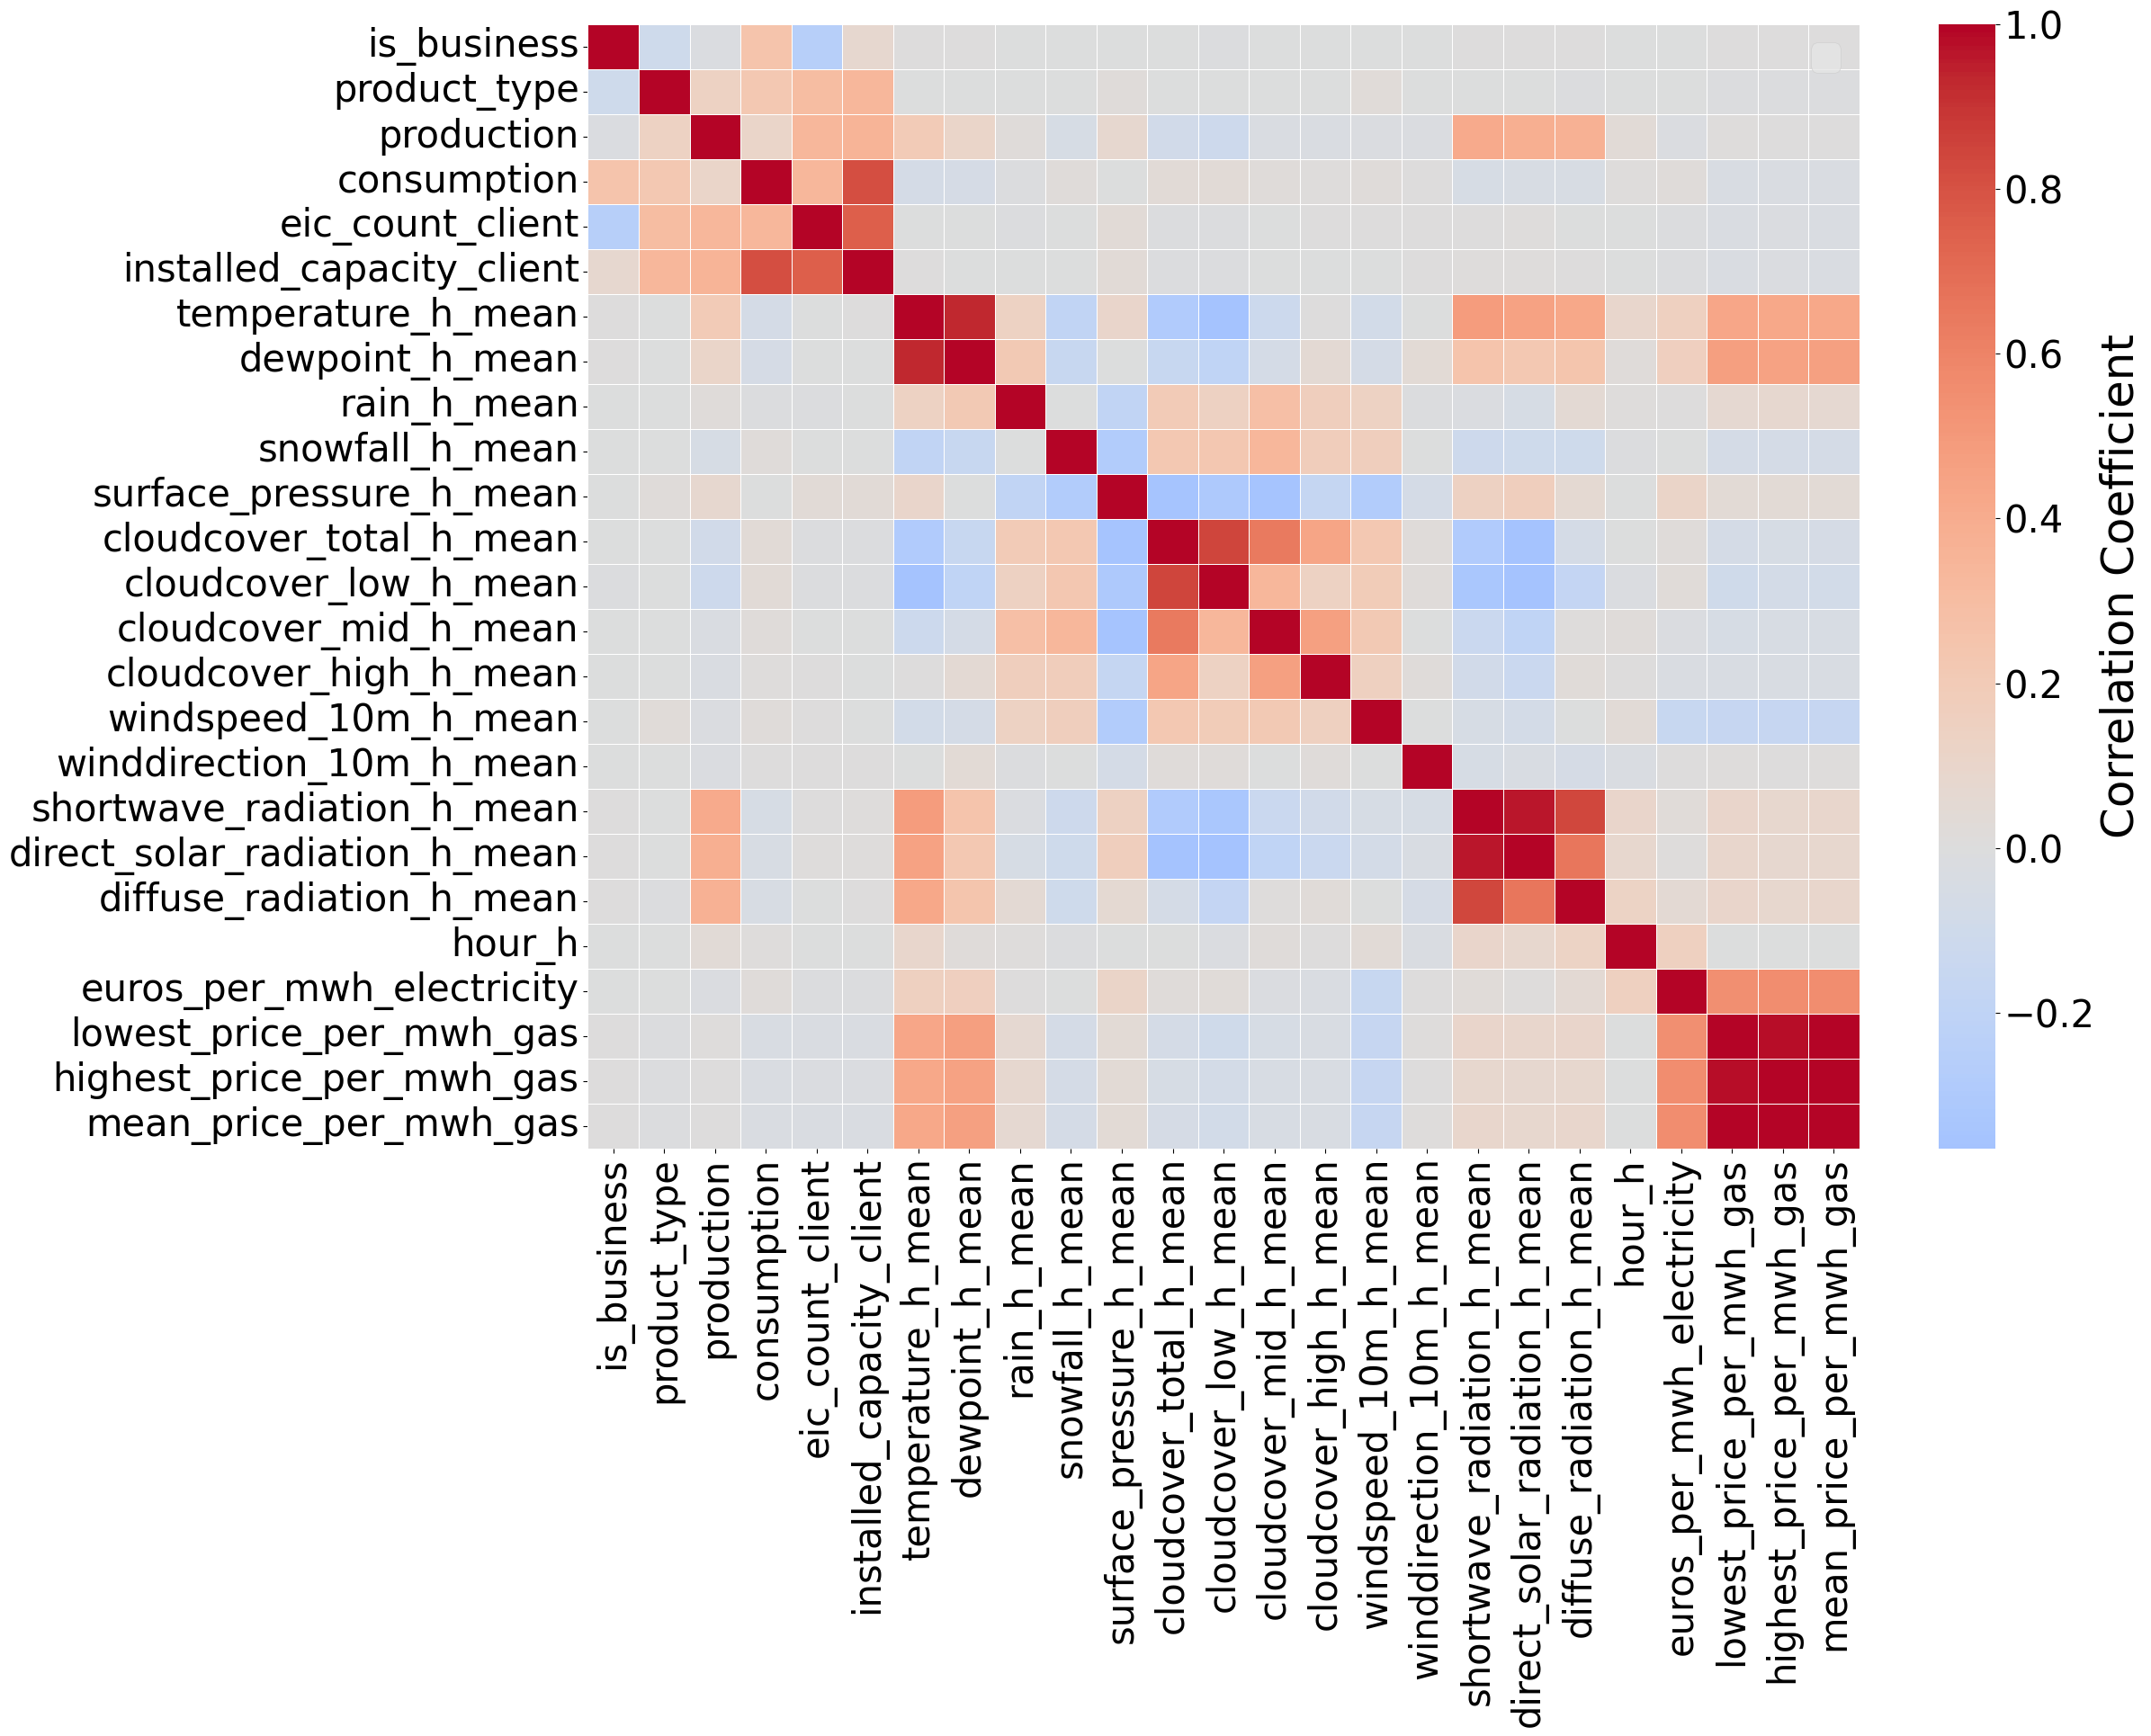

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 30
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Select only numeric features
numeric_df = df_clean.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Identify rows/columns to drop: those that match "target_*_days_ago"
to_drop = [col for col in corr_matrix.columns if "target_" in col and "_days_ago" in col or "_f_" in col]

for label in ["county", "year", "quarter", "month", "week", "hour", "day_of_year", "day_of_month", "day_of_week"]:
    to_drop.append(label)
valid_to_drop = list(set(to_drop) & set(corr_matrix.columns))

# Drop them from rows and columns
filtered_corr = corr_matrix.drop(index=to_drop, columns=to_drop)

# Plot heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    center=0,
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}  # ← add label here
)

# # Rotate x and y axis labels
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
plt.legend("correlation coefficient")
plt.tight_layout()
plt.show()

In [ ]:
# Show all rows
pd.set_option('display.max_rows', None)  # Set to None for unlimited, or a number like 200

# Optional: also increase column display
pd.set_option('display.max_columns', None)

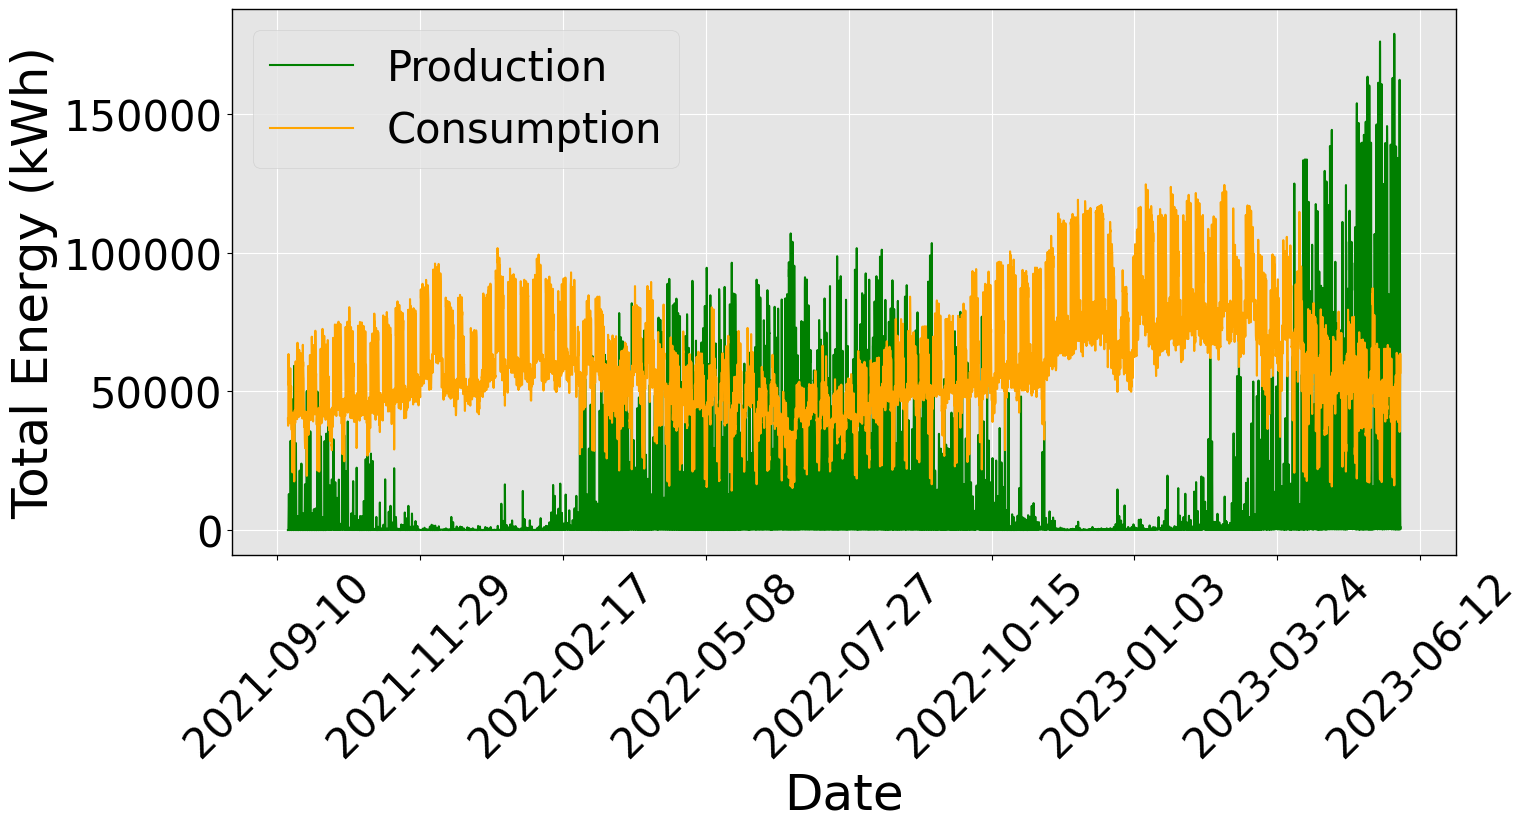

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is a datetime object
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])

# Sort by time
df_clean = df_clean.sort_values(by='datetime')

# Group by datetime and sum over all counties/prosumers
time_series = df_clean.groupby('datetime')[['production', 'consumption']].sum().reset_index()

# Plot
plt.figure(figsize=(16, 9))
plt.plot(time_series['datetime'], time_series['production'], label='Production', color='green')
plt.plot(time_series['datetime'], time_series['consumption'], label='Consumption', color='orange')

# Format x-axis
plt.xticks(rotation=45)  # Rotate dates
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show at most 10 date ticks

# Formatting
plt.xlabel("Date")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

<Figure size 1900x1100 with 0 Axes>

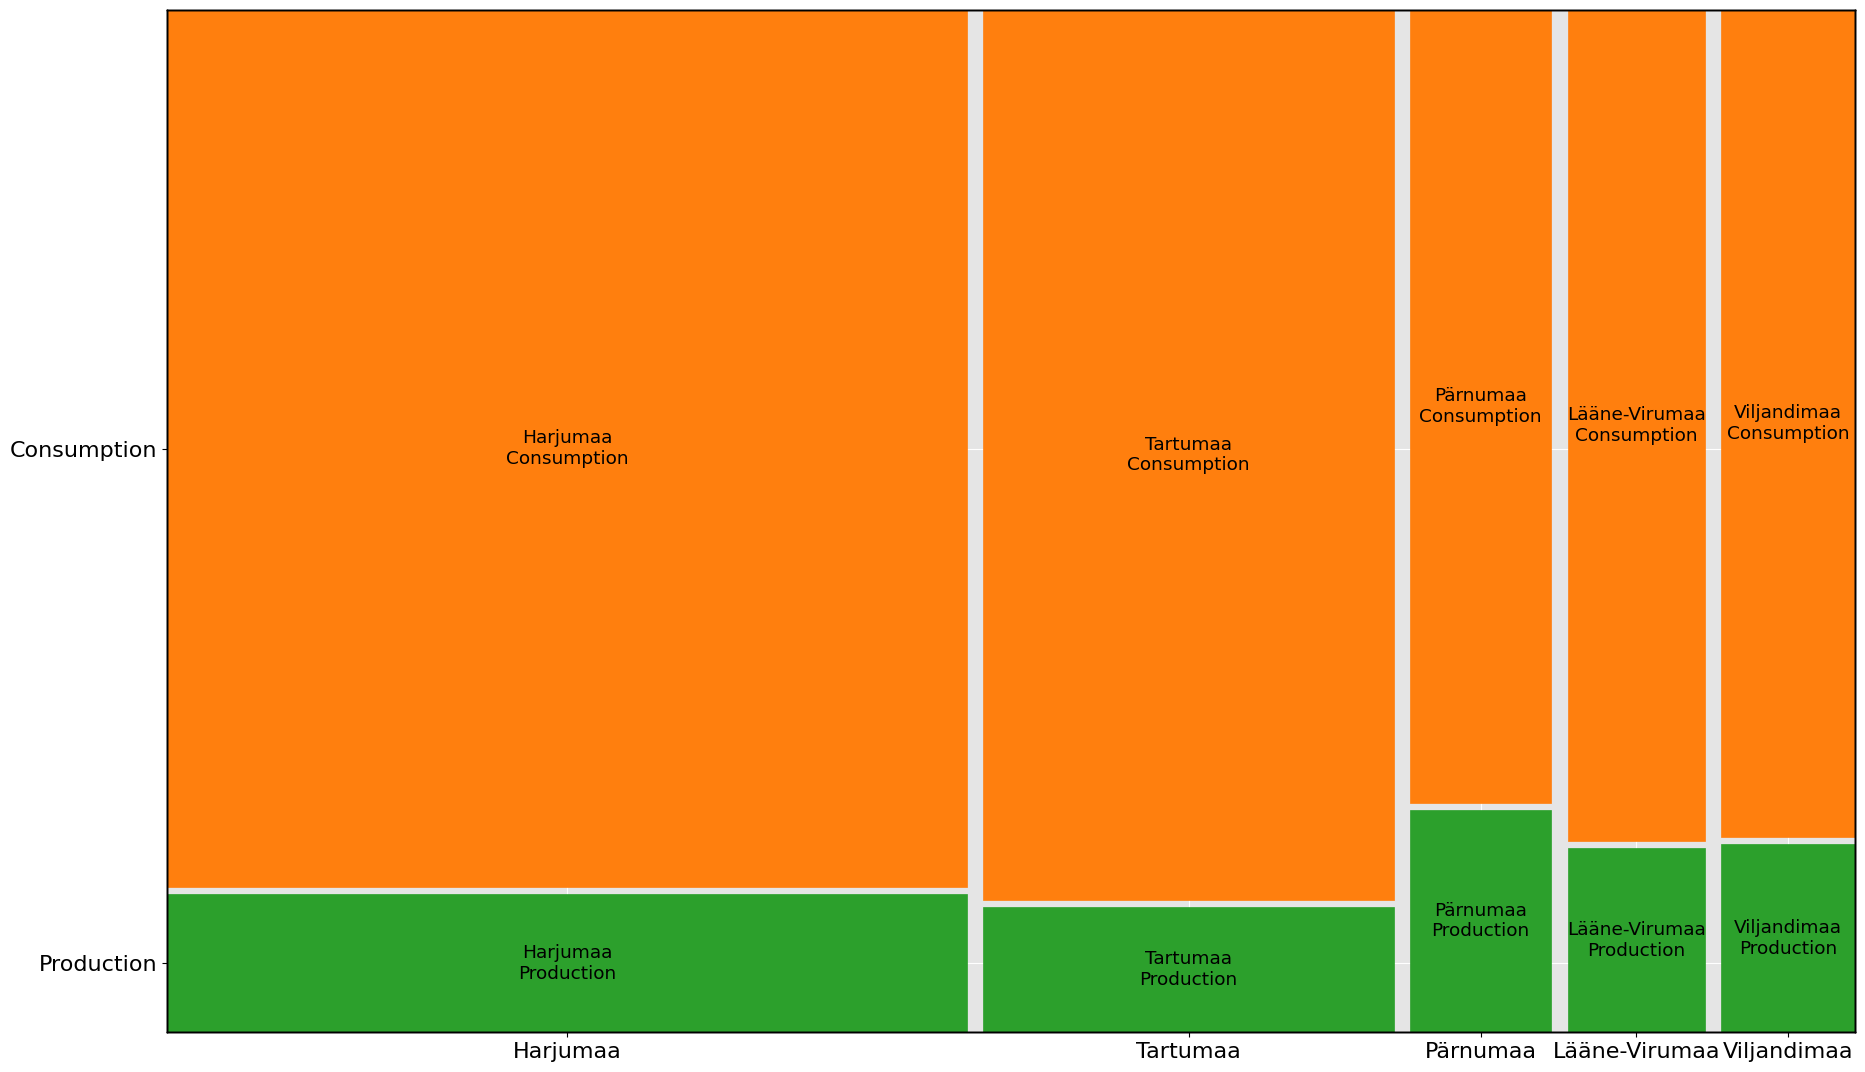

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import json

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 16
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Load county name mapping
with open("county_id_to_name_map.json", "r") as f:
    id_to_name = json.load(f)
id_to_name = {int(k): v.title().replace("_", " ") for k, v in id_to_name.items()}

# Summarize total energy (production + consumption)
totals = (
    df_clean.groupby('county')[['production', 'consumption']]
    .sum()
    .reset_index()
)
totals['total_energy'] = totals['production'] + totals['consumption']

# Filter to top 5 counties
top5 = totals.nlargest(5, 'total_energy')

# Prepare data for mosaic
mosaic_data = {}
for _, row in top5.iterrows():
    county_id = row['county']
    county_name = id_to_name.get(county_id, f'County {county_id}')
    mosaic_data[(county_name, 'Production')] = row['production']
    mosaic_data[(county_name, 'Consumption')] = row['consumption']

# Set colors: green for production, orange for consumption
props = lambda key: {
    'color': '#2ca02c' if key[1] == 'Production' else '#ff7f0e'
}

# Plot
plt.figure(figsize=(19, 11))
mosaic(mosaic_data, properties=props, gap=0.01)

plt.tight_layout()
plt.show()